## Contours Detection
Using contour detection, we can detect the borders of objects, and localize them easily in an image. It is often the first step for many interesting applications, such as image-foreground extraction, simple-image segmentation, detection and recognition. 

### Applications
1. Motion Detection
2. Unattended object detection
3. Background / Foreground Segmentation


### What are Contours
When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity. OpenCV makes it really easy to find and draw contours in images. It provides two simple functions:
- findContours()
- drawContours()

Also, it has two different algorithms for contour detection:
- CHAIN_APPROX_SIMPLE
- CHAIN_APPROX_NONE


### Steps for Detecting and Drawing Contours in OpenCV
1. Read the Image and convert it to Grayscale Format
2. Apply Binary Thresholding
3. Find the Contours
4. Draw Contours on the Original RGB Image.

**IMPLEMENTATION**

In [2]:
import cv2
 
# read the image
image = cv2.imread('images/number_plate.jpg')

In [3]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

In [5]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

## Contour Hierarchies

Hierarchies denote the parent-child relationship between contours. You will see how each contour-retrieval mode affects contour detection in images, and produces hierarchical results.

### Parent-Child Relationship

Objects detected by contour-detection algorithms in an image could be:  

1. Single objects scattered around in an image (as in the first example), or
2. Objects and shapes inside one another 


In most cases, where a shape contains more shapes, we can safely conclude that the outer shape is a parent of the inner shape.

Take a look at the following figure, it contains several simple shapes that will help demonstrate contour hierarchies.

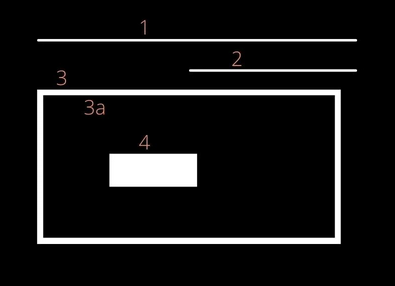

Now see below figure, where the contours associated with each shape in Figure 10 have been identified. Each of the numbers in Figure 11 have a significance. 

1. All the individual numbers, i.e., 1, 2, 3, and 4 are separate objects, according to the contour hierarchy and parent-child relationship.
2. We can say that the 3a is a child of 3. Note that 3a represents the interior portion of contour 3.
3. Contours 1, 2, and 4 are all parent shapes, without any associated child, and their numbering is thus arbitrary. In other words, contour 2 could have been labeled as 1 and vice-versa.


## Different Contour Retrieval Techniques

Thus far, we used one specific retrieval technique, `RETR_TREE` to find and draw contours,  but there are three more contour-retrieval techniques in OpenCV, namely, `RETR_LIST`, `RETR_EXTERNAL` and `RETR_CCOMP`.

So let’s now use the image in Figure 10 to review each of these four methods, along with their associated code to get the contours.

The following code reads the image from disk, converts it to grayscale, and applies binary thresholding.

In [6]:
image2 = cv2.imread('images/con.png')
img_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(img_gray2, 150, 255, cv2.THRESH_BINARY)

**RETR_LIST**

The `RETR_LIST` contour retrieval method does not create any parent child relationship between the extracted contours. So, for all the contour areas that are detected, the First_Child and Parent index position values are always -1.

All the contours will have their corresponding Previous and Next contours as discussed above. 

See how the `RETR_LIST` method is implemented in code.

In [7]:
contours3, hierarchy3 = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
image_copy4 = image2.copy()
cv2.drawContours(image_copy4, contours3, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('LIST', image_copy4)
print(f"LIST: {hierarchy3}")
cv2.waitKey(0)
cv2.imwrite('contours_retr_list.jpg', image_copy4)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

LIST: [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [-1  4 -1 -1]]]


**RETR_EXTERNAL**

The `RETR_EXTERNAL` contour retrieval method is a really interesting one. It only detects the parent contours, and ignores any child contours. So, all the inner contours like 3a and 4 will not have any points drawn on them.

In [8]:
contours4, hierarchy4 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
image_copy5 = image2.copy()
cv2.drawContours(image_copy5, contours4, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('EXTERNAL', image_copy5)
print(f"EXTERNAL: {hierarchy4}")
cv2.waitKey(0)
cv2.imwrite('contours_retr_external.jpg', image_copy5)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

EXTERNAL: [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2 -1 -1]]]


**RETR_CCOMP**

Unlike `RETR_EXTERNAL`,`RETR_CCOMP` retrieves all the contours in an image. Along with that, it also applies a 2-level hierarchy to all the shapes or objects in the image.

This means:

    - All the outer contours will have hierarchy level 1
    - All the inner contours will have hierarchy level 2

But what if we have a contour inside another contour with hierarchy level 2? Just like we have contour 4 after contour 3a.

In that case:

     - Again, contour 4 will have hierarchy level 1.
     - If there are any contours inside contour 4, they will have hierarchy level 2.

In the following image, the contours have been numbered according to their hierarchy level, as explained above. 

In [9]:
contours5, hierarchy5 = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
image_copy6 = image2.copy()
cv2.drawContours(image_copy6, contours5, -1, (0, 255, 0), 2, cv2.LINE_AA)
 
# see the results
cv2.imshow('CCOMP', image_copy6)
print(f"CCOMP: {hierarchy5}")
cv2.waitKey(0)
cv2.imwrite('contours_retr_ccomp.jpg', image_copy6)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

CCOMP: [[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [ 4  1 -1 -1]
  [ 5  3 -1 -1]
  [-1  4 -1 -1]]]


**RETR_TREE**

Just like `RETR_CCOMP`, `RETR_TREE` also retrieves all the contours. It also creates a complete hierarchy, with the levels not restricted to 1 or 2. Each contour can have its own hierarchy, in line with the level it is on, and the corresponding parent-child relationship that it has.

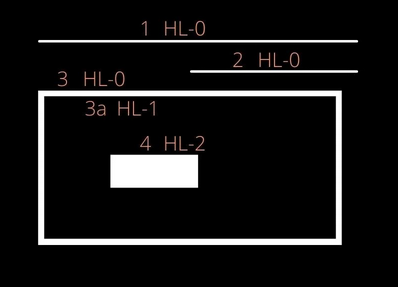

From the above figure, it is clear that:
- Contours 1, 2, and 3 are at the same level, that is level 0.
- Contour 3a is present at hierarchy level 1, as it is a child of contour 3.
- Contour 4 is a new contour area, so its hierarchy level is 2.


In [11]:
contours6, hierarchy6 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_copy7 = image2.copy()
cv2.drawContours(image_copy7, contours6, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('TREE', image_copy7)
print(f"TREE: {hierarchy6}")
cv2.waitKey(0)
cv2.imwrite('contours_retr_tree.jpg', image_copy7)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread (0x2ce1740).
Cannot move to target thread (0x22b1730)

QObject::moveToThread: Current thread (0x22b1730) is not the object's thread

TREE: [[[ 3 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1 -1  1]
  [ 4  0 -1 -1]
  [ 5  3 -1 -1]
  [-1  4 -1 -1]]]
